In [62]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Load files
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
trial_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_data_df, trial_data_df, how='inner', on='Mouse ID')

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [63]:
# Group data by Drug and Timepoint
drug_time_groups = combined_data_df.groupby(["Drug", "Timepoint"])

# Store the Mean Tumor Volume Data
mean_tumor_vol = drug_time_groups["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_mean_df = pd.DataFrame(mean_tumor_vol).reset_index(["Drug", "Timepoint"])

# Preview DataFrame
tumor_mean_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [64]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol = drug_time_groups["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_sem_df = pd.DataFrame(sem_tumor_vol).reset_index(["Drug", "Timepoint"])

# Preview DataFrame
tumor_sem_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [65]:
# Minor Data Munging to Re-Format the Mean Data Frame
reformat_tumor_mean_df = tumor_mean_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that reformatting worked
reformat_tumor_mean_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [66]:
# Minor Data Munging to Re-Format the SEM Data Frame
reformat_tumor_sem_df = tumor_sem_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that reformatting worked
reformat_tumor_sem_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


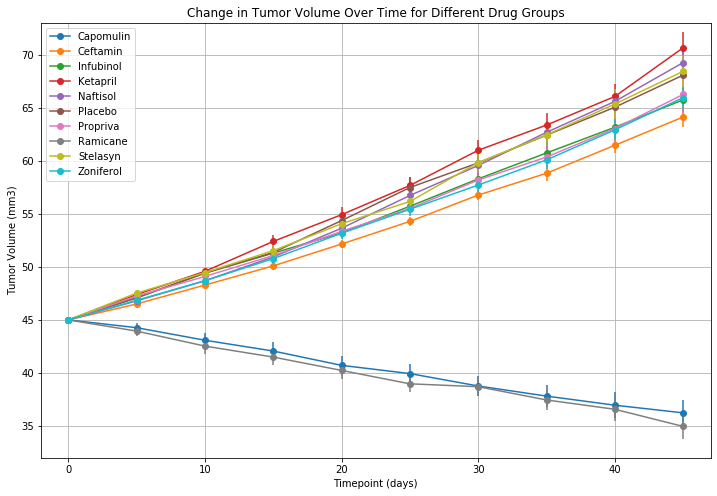

In [67]:
#Generate the Plot (with Error Bars)

x_axis = reformat_tumor_mean_df.index.values
num_drug_groups = len(reformat_tumor_mean_df.columns)

fig, ax = plt.subplots(figsize=(12, 8))
for i in range(num_drug_groups):
    ax.errorbar(x_axis, reformat_tumor_mean_df.iloc[:, i], yerr=reformat_tumor_sem_df.iloc[:, i], fmt="o", linestyle='-', 
                Label=reformat_tumor_mean_df.columns[i])

# Make the plot pretty and easy to read
ax.set_xlim(-2, 47)
ax.set_ylim(32, 73)
ax.set_xlabel("Timepoint (days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Change in Tumor Volume Over Time for Different Drug Groups")
ax.legend(loc='best', frameon=True)
ax.grid()

#Save the Figure
plt.savefig('../Pymaceuticals/tumor_vol_time.png')

#Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [68]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_sites = drug_time_groups["Metastatic Sites"].mean()

# Convert to DataFrame
metsites_mean_df = pd.DataFrame(mean_met_sites).reset_index(["Drug", "Timepoint"])

# Preview DataFrame
metsites_mean_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [69]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_sites = drug_time_groups["Metastatic Sites"].sem()

# Convert to DataFrame
metsites_sem_df = pd.DataFrame(sem_met_sites).reset_index(["Drug", "Timepoint"])

# Preview DataFrame
metsites_sem_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [70]:
# Minor Data Munging to Re-Format the Data Frames
reformat_metsites_mean_df = metsites_mean_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that reformatting worked
reformat_metsites_mean_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [71]:
# Minor Data Munging to Re-Format the SEM Data Frame
reformat_metsites_sem_df = metsites_sem_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that reformatting worked
reformat_metsites_sem_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


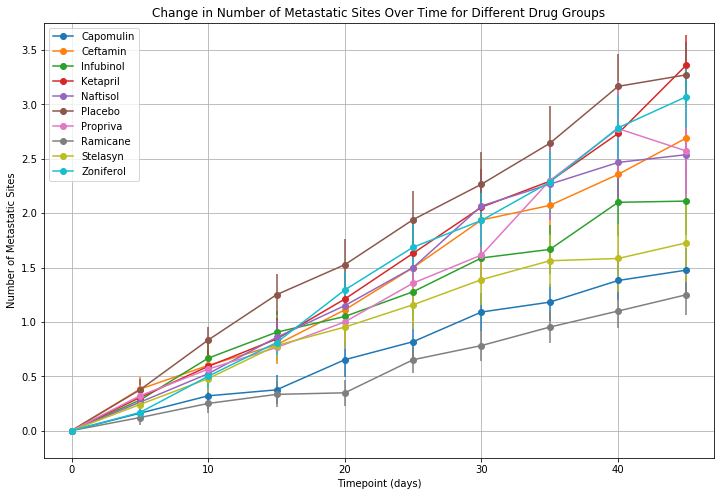

In [72]:
# Generate the Plot (with Error Bars)

x_axis = reformat_metsites_mean_df.index.values
num_drug_groups = len(reformat_tumor_mean_df.columns)

fig, ax = plt.subplots(figsize=(12, 8))
for i in range(num_drug_groups):
    ax.errorbar(x_axis, reformat_metsites_mean_df.iloc[:, i], yerr=reformat_metsites_sem_df.iloc[:, i], fmt="o", linestyle='-', 
                Label=reformat_metsites_mean_df.columns[i])

# Make the plot pretty and easy to read
ax.set_xlim(-2, 47)
ax.set_ylim(-0.25, 3.75)    
ax.set_xlabel("Timepoint (days)")
ax.set_ylabel("Number of Metastatic Sites")
ax.set_title("Change in Number of Metastatic Sites Over Time for Different Drug Groups")
ax.legend(loc='best', frameon=True)
ax.grid()

# Save the Figure
plt.savefig('../Pymaceuticals/met_sites_time.png')

#Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [73]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
num_mice = drug_time_groups["Mouse ID"].nunique()

# Convert to DataFrame
mice_surv_df = pd.DataFrame(num_mice).reset_index(["Drug", "Timepoint"]).rename(columns={"Mouse ID":"Mouse Count"})

# Preview DataFrame
mice_surv_df

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [74]:
#Calculate Survival Rate for mice
starting_mice = 25
mice_surv_df["Survival Rate"] = (mice_surv_df["Mouse Count"]/starting_mice)*100
mice_surv_df

,Drug,Timepoint,Mouse Count,Survival Rate
0,Capomulin,0,25,100.0
1,Capomulin,5,25,100.0
2,Capomulin,10,25,100.0
3,Capomulin,15,24,96.0
4,Capomulin,20,23,92.0
...,...,...,...,...
95,Zoniferol,25,16,64.0
96,Zoniferol,30,15,60.0
97,Zoniferol,35,14,56.0
98,Zoniferol,40,14,56.0


In [75]:
# Minor Data Munging to Re-Format the Data Frames
reformat_mice_surv_df = mice_surv_df.pivot(index="Timepoint", columns="Drug", values="Survival Rate")

# Preview the Data Frame
reformat_mice_surv_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,64.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,64.0,92.0,80.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


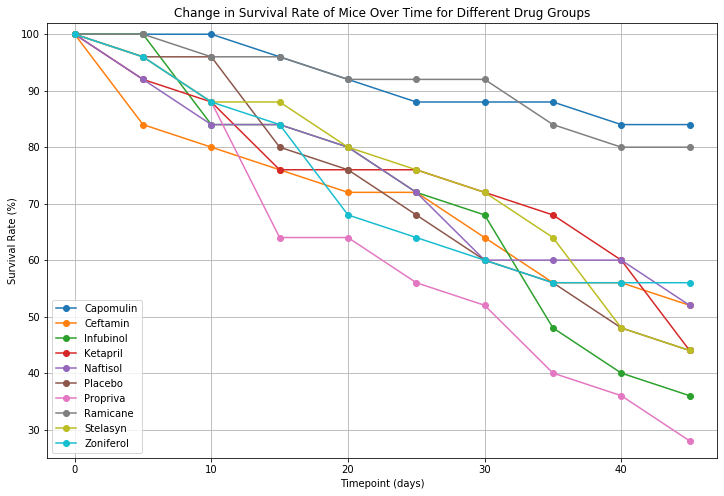

In [76]:
# Generate the Plot (Accounting for percentages)
x_axis = reformat_mice_surv_df.index.values
num_drug_groups = len(reformat_mice_surv_df.columns)

fig, ax = plt.subplots(figsize=(12, 8))
for i in range(num_drug_groups):
    ax.errorbar(x_axis, reformat_mice_surv_df.iloc[:, i], fmt="o", linestyle='-', Label=reformat_metsites_mean_df.columns[i])

# Make the plot pretty and easy to read
ax.set_xlim(-2, 47)
ax.set_ylim(25, 102)   
ax.set_xlabel("Timepoint (days)")
ax.set_ylabel("Survival Rate (%)")
ax.set_title("Change in Survival Rate of Mice Over Time for Different Drug Groups")
ax.legend(loc='best', frameon=True)
ax.grid()

# Save the Figure
plt.savefig('../Pymaceuticals/mice_surv_time_lines.png')

#Show Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [77]:
# Calculate the percent changes for each drug
drug_groups = tumor_mean_df.set_index("Drug")

tumor_start_vol = drug_groups.loc[drug_groups["Timepoint"] == 0, ["Tumor Volume (mm3)"]]
tumor_end_vol = drug_groups.loc[drug_groups["Timepoint"] == 45, ["Tumor Volume (mm3)"]]

tumor_change = tumor_end_vol - tumor_start_vol
tumor_percent_df = (tumor_change/tumor_start_vol)*100

# Preview data to confirm
tumor_percent_df

,Tumor Volume (mm3)
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


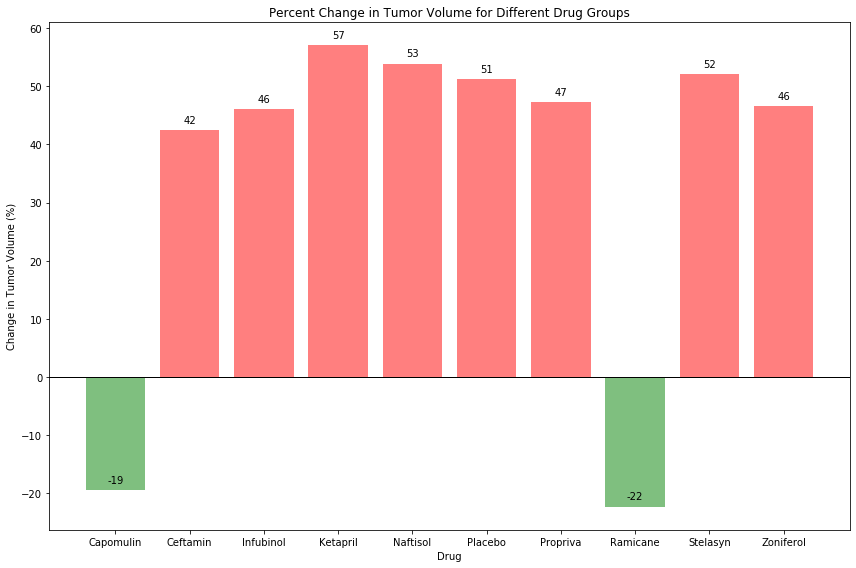

In [78]:
# Generate the plot
x_axis = np.arange(len(tumor_percent_df))
x_labels = (tumor_percent_df.index.values)
tick_locations = (x for x in x_axis)

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x_axis, tumor_percent_df["Tumor Volume (mm3)"], color=(tumor_percent_df["Tumor Volume (mm3)"] > 0).map({True: 'r',
                                                            False: 'g'}), alpha=0.5, align="center")
ax.set_xticks(x_axis)
ax.set_xticklabels(x_labels)
ax.axhline(linewidth=1, color='black')

# Make the plot pretty and easy to read
ax.set_title("Percent Change in Tumor Volume for Different Drug Groups")
ax.set_xlabel("Drug")
ax.set_ylabel("Change in Tumor Volume (%)")

fig.tight_layout()

# Use functions to label the percentages of changes
# Call functions to implement the function calls
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1, ax)

# Save the Figure
plt.savefig('../Pymaceuticals/bar_percent_change_tumors.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)